In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [21]:
img = cv2.imread('images/plate1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [23]:
blur = cv2.GaussianBlur(gray,(7,7),0)

In [24]:
# convert the image to a 2D array of pixels
pixel_values = blur.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6 # number of clusters k

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(blur.shape)

In [25]:
_, thresh = cv2.threshold(segmented_image, 165, 255, 0)

In [26]:
edges = cv2.Canny(thresh,120,200)

In [27]:
kernelClose=np.ones((8,8))
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernelClose)

([], [])

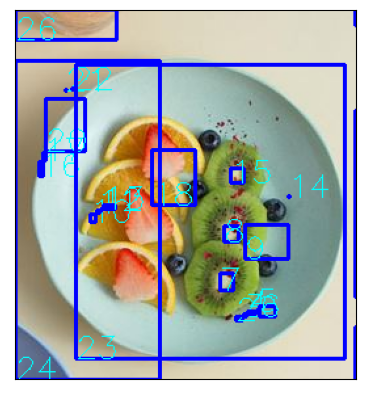

In [51]:

new_img = img.copy()
conts,h=cv2.findContours(closing.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(new_img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255))
# show the image
plt.imshow(new_img, cmap='brg', vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

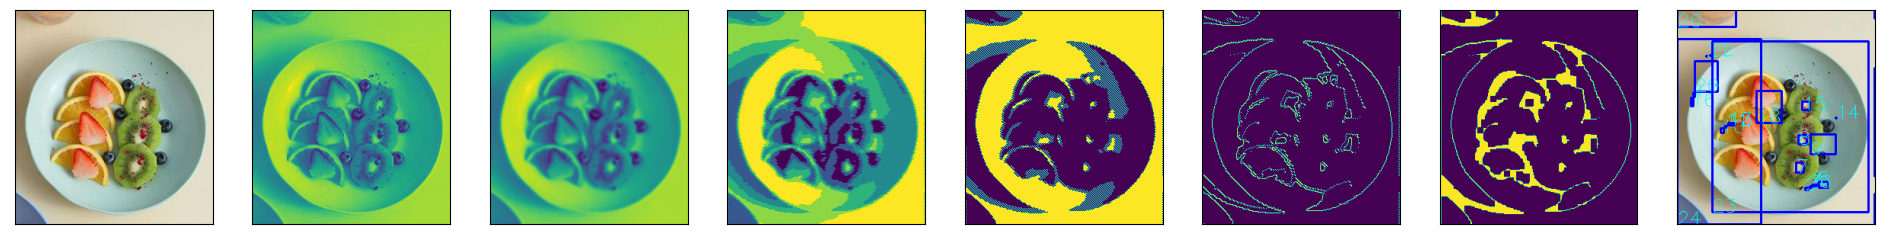

In [55]:
img_array = [img, gray, blur, segmented_image, thresh, edges, closing, new_img]


# Create a 4x4 plot axes
fig, axs = plt.subplots(1, 8, figsize=(24, 12), facecolor='w', edgecolor='k')

# Remove tick marks
for ax in axs.flat:
    ax.set(xticks=[], yticks=[])

# Display an image from the image array in each subplot
for i, ax in enumerate(axs.flat):
    ax.imshow(img_array[i])

# Show the plot
plt.show()

TODO: 
Pre-processing: Perform image enhancement techniques such as color correction, histogram equalization, or denoising to improve the overall quality of the image.

Color-based segmentation: Convert the image to a color space that separates the strawberries from the background, such as HSV. Then use a range of threshold values to segment the strawberries based on their color.

Morphological operations: Use morphological operations such as dilation and erosion to remove noise, fill small holes, and separate individual strawberries.

Edge detection: Use edge detection techniques such as Canny or Sobel to identify the boundaries of the strawberries.

Blob detection: Use blob detection algorithms such as SimpleBlobDetector to detect and segment the strawberries based on their size and shape.

Post-processing: Use techniques such as connected component analysis to remove small unwanted objects and refine the segmentation.